In [60]:
import warnings
import numpy as np

warnings.simplefilter("ignore", category=np.exceptions.VisibleDeprecationWarning)


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from graph_cut import * 


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
from sklearn.cluster import KMeans
import maxflow
from graph_cut import * 


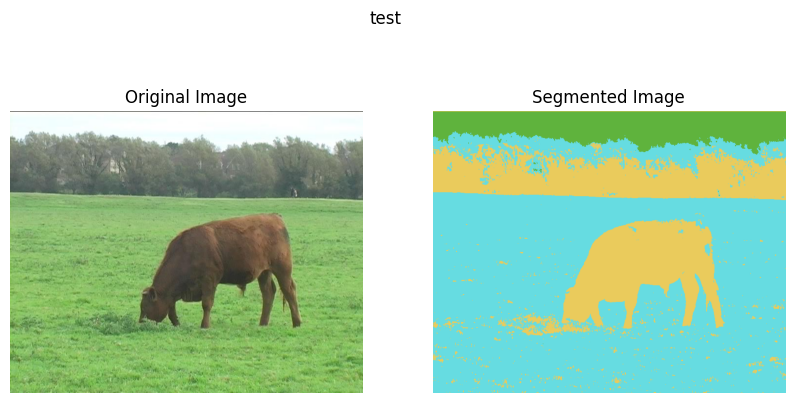

In [4]:
image_path = "images/cow.ppm"  # Replace with actual image path
K=3
image = load_image(image_path)
labels = initialize_labels_bis(image, K=K, method='kmeans')
show_segmentation(image, labels,title="test")


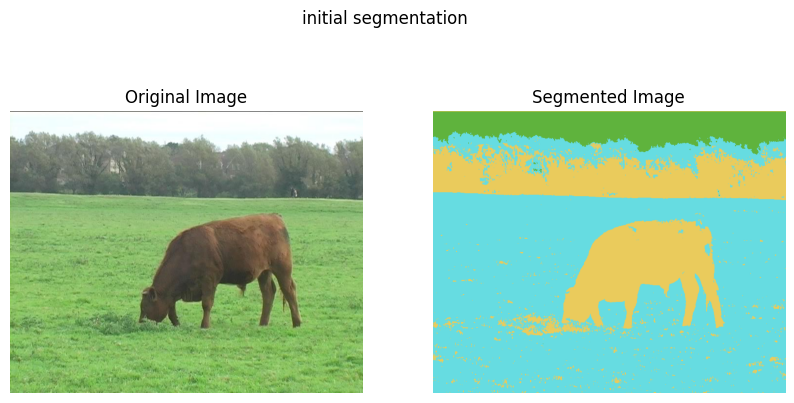

(576, 720, 3)
(576, 720, 3, 3)


In [5]:
image_path = "images/cow.ppm"  # Replace with actual image path
K=3
image = load_image(image_path)
labels = initialize_labels_bis(image, K=K, method='kmeans')
show_segmentation(image, labels,title="initial segmentation")

histograms = compute_histograms(image, labels, K=K, bins = 16)
unary_term = compute_unary_term(image, labels,histograms, K=K, bins=16)
pairwise_term = compute_pairwise_term(image, K=K, lambda_val=200)
print(unary_term.shape)
print(pairwise_term.shape)	

In [ ]:
# Compute Pairwise Term Using Normal model
# follow the paper idea. IT add a colors idea 
def compute_pairwise_term_normal(image, K, lambda_1=5,lambda_2=100,sigma=5):
    h, w, _ = image.shape
    pairwise = np.zeros((h, w,2,2, K, K))
    
    for i in range(h - 1):
        for j in range(w - 1):

            #         for k1 in range(K):
            #             for k2 in range(K):
            #                 pairwise[i, j, i, j, k1, k2] = lambda_val * (k1 != k2)
            for i1 in [1,-1]:
                for j1 in [1,-1]:
                    for k1 in range(K):
                        for k2 in range(K):

                            if i1<0 or i1>=h or j1<0 or j1>=w:
                                continue
                            dist_ij_i1j1=np.sqrt((1)**2+(1)**2)
                            lambda_val=lambda_1+lambda_2*np.exp(-np.linalg.norm(image[i,j]-image[i1,j1])**2/2*sigma**2)/dist_ij_i1j1
                            pairwise[i, j,i1,j1, k1, k2] = lambda_val * (k1 != k2)  # Potts model penalty
    
    return pairwise
pairwise_term = compute_pairwise_term_normal(image, K=K, lambda_1=5,lambda_2=100,sigma=5)

In [8]:
import numpy as np
from scipy.ndimage import convolve

def compute_pairwise_term_normal_approx(image, K, lambda_1=5, lambda_2=100, sigma=5):
    h, w, c = image.shape
    pairwise = np.zeros((h, w, K, K))  # Corrected shape

    # Define a 3x3 averaging kernel
    kernel = np.ones((3, 3)) / 9.0

    # Apply convolution to each color channel separately
    mean_color = np.zeros_like(image)
    for ch in range(c):
        mean_color[:, :, ch] = convolve(image[:, :, ch], kernel, mode='reflect')

    # Compute Euclidean norm of color difference
    color_diff = np.linalg.norm(image - mean_color, axis=2)

    # Compute lambda values
    lambda_vals = lambda_1 + lambda_2 * np.exp(- (color_diff ** 2) / (2 * sigma ** 2))

    # Assign lambda values using broadcasting
    for k1 in range(K):
        for k2 in range(K):
            pairwise[:, :, k1, k2] = lambda_vals * (k1 != k2)  # Potts model penalty

    return pairwise

pairwise_term = compute_pairwise_term_normal_approx(image, K=K, lambda_1=5,lambda_2=100,sigma=5)
pairwise_term.shape

(576, 720, 3, 3)

## Lots of unary possibility :


(576, 720, 3)
labels: (576, 720)


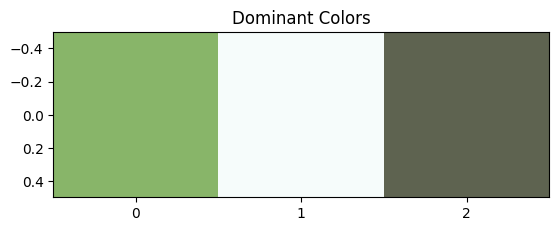

In [9]:
print(image.shape)
labels = initialize_labels_bis(image, K=K, method='kmeans')
# get the dominant colors for every labels
print("labels:",labels.shape)
from graph_cut.display import show_dominant_colors
show_dominant_colors( labels,image, K=K)

## L2 unary possibility

(576, 720, 3)
labels (576, 720)


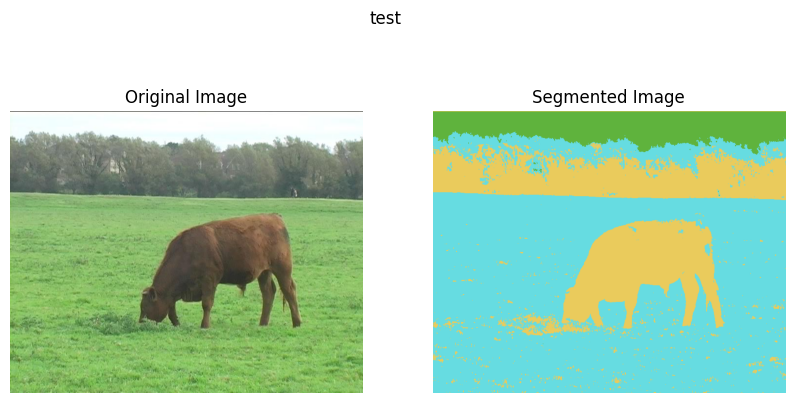

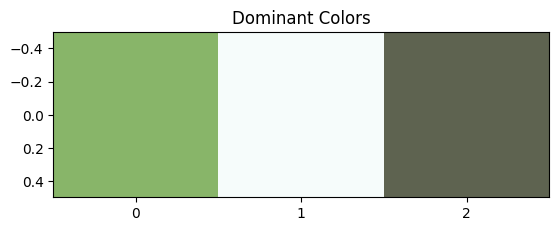

In [14]:
# Compute Unary Term Using L2 norm
from graph_cut.unary_cost import compute_unary_term_L2
image_path = "images/cow.ppm"  # Replace with actual image path
K=3
image = load_image(image_path)
print(image.shape)
labels = initialize_labels_bis(image, K=K, method='kmeans')
print("labels", labels.shape)
show_segmentation(image, labels,title="test")
show_dominant_colors(labels=labels,image=image,K=K)
dominants_colors=get_dominant_colors(labels=labels, image=image, K=K)
unary_term = compute_unary_term_L2(image,dominants_colors)

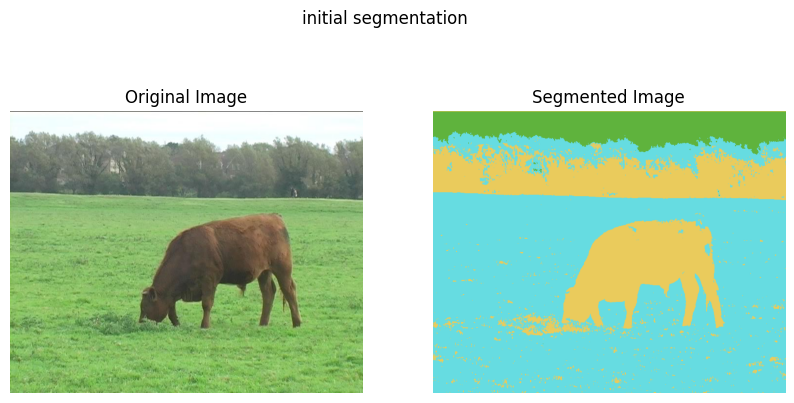

In [21]:
image_path = "images/cow.ppm"  # Replace with actual image path
K=3
image = load_image(image_path)
labels = initialize_labels_bis(image, K=K, method='kmeans')
show_segmentation(image, labels,title="initial segmentation")
dominants_colors=get_dominant_colors(labels=labels, image=image, K=K)
histograms = compute_histograms(image, labels, K=K, bins = 16)
unary_term = compute_unary_term_L2(image=image,labels_color=dominants_colors)
pairwise_term = compute_pairwise_term(image, K=K, lambda_val=200)


(576, 720)


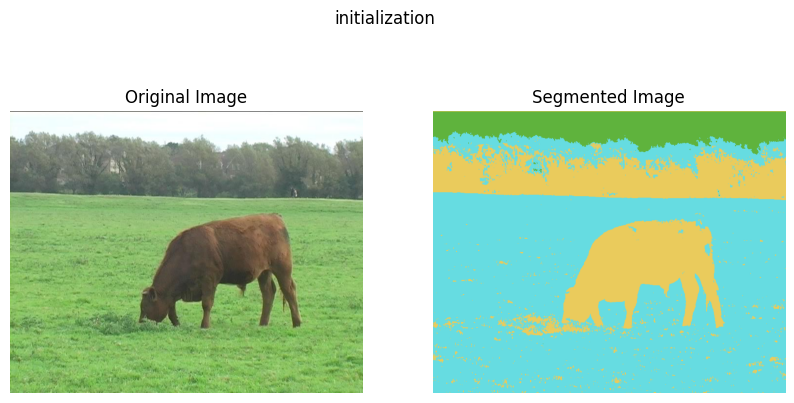

first energy 16176254.314208128
iterations nb: 0
computed energy 12616771.580157742 is it greater than initial energy? False


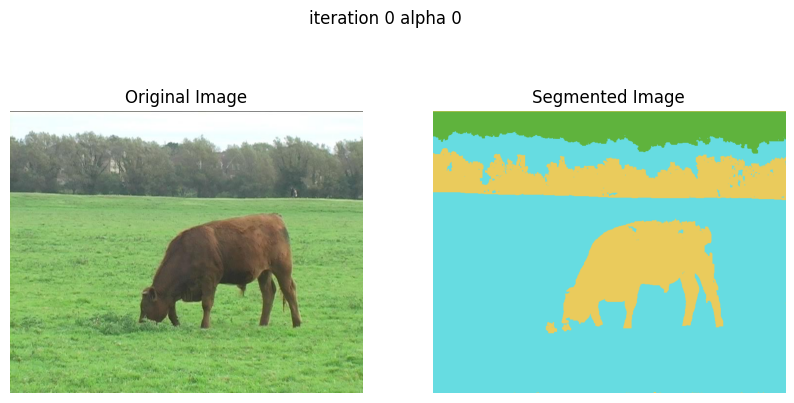

energy 12616771.580157742
computed energy 12600372.53681606 is it greater than initial energy? False


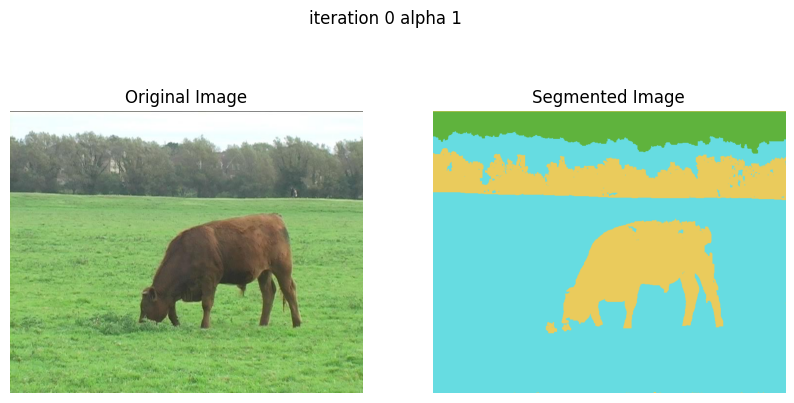

energy 12600372.53681606
computed energy 12119190.298351495 is it greater than initial energy? False


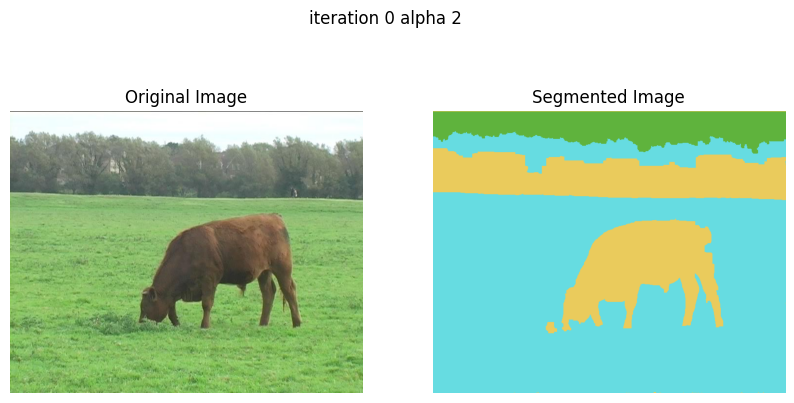

energy 12119190.298351495
iterations nb: 1
computed energy 12119190.298351495 is it greater than initial energy? False
computed energy 12119190.298351495 is it greater than initial energy? False
computed energy 12119190.298351495 is it greater than initial energy? False
iterations nb: 2
computed energy 12119190.298351495 is it greater than initial energy? False
computed energy 12119190.298351495 is it greater than initial energy? False
computed energy 12119190.298351495 is it greater than initial energy? False
iterations nb: 3
computed energy 12119190.298351495 is it greater than initial energy? False
computed energy 12119190.298351495 is it greater than initial energy? False
computed energy 12119190.298351495 is it greater than initial energy? False


In [23]:
labels=np.argmin(unary_term, axis=2)
print(labels.shape)
from graph_cut.alpha_expansion import Alpha_expansion2
a_exp=Alpha_expansion2(image=image,unary=unary_term,pairwise=pairwise_term,K=K,max_iterations=4)
labels=a_exp.run(image)

## L2 ScieLAB run

[[2 2 2 ... 2 2 2]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


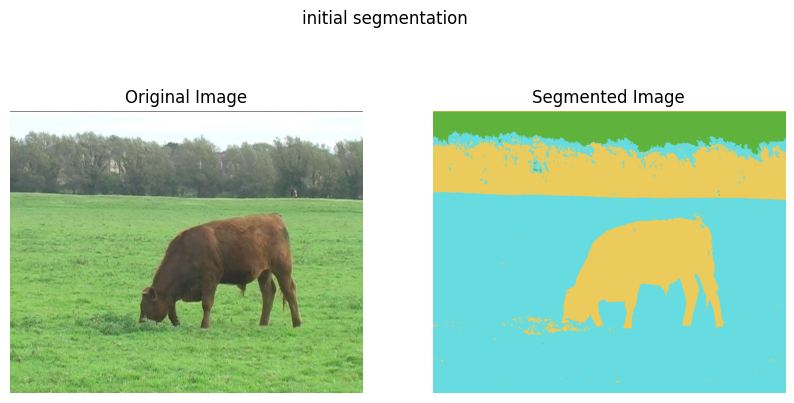

In [26]:
from graph_cut.unary_cost import unary_term_L2_sCIELAB
dominants_colors=get_dominant_colors(labels=labels, image=image, K=K)
unary_term = unary_term_L2_sCIELAB(image,dominants_colors)
unary_term
labels=unary_term.argmin(axis=2)
print(labels)
show_segmentation(image, labels,title="initial segmentation")

In [ ]:
image_path = "images/cow.ppm"  # Replace with actual image path
K=3
image = load_image(image_path)
labels = initialize_labels_bis(image, K=K, method='kmeans')
show_segmentation(image, labels,title="initial segmentation")
dominants_colors=get_dominant_colors(labels=labels, image=image, K=K)
histograms = compute_histograms(image, labels, K=K, bins = 16)
unary_term = unary_term_L2_sCIELAB(image=image,labels_color=dominants_colors)
pairwise_term = compute_pairwise_term(image, K=K, lambda_val=200)


(3, 3)